In [2]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pickle
import pdb

sys.path.append('..')

from postprocess import postprocess_dir
from utils import gen_covariance, gen_beta2, gen_data, selection_accuracy
from misc import calc_avg_cov, calc_clustering, get_cov_list

from pyuoi.linear_model.lasso import UoI_Lasso

In [3]:
# %load ../datgen.py
n_features = 50
n_samples = 150

In [23]:
# First sanity check: The selection accuracy increase is not due to the union operation
with open('union_results.dat', 'rb') as f:
    sa = pickle.load(f)
    sa_alt = pickle.load(f)
    sa_max_estimates = pickle.load(f)
    sa_alt_max_estimates = pickle.load(f)

In [56]:
# Mean and variance of selection accuracies of the "best estimates"
max_estimates_mean = np.zeros(len(sa_max_estimates))
max_estimates_var = np.zeros(len(sa_max_estimates))

alt_estimates_mean = np.zeros(len(sa_alt_max_estimates))
alt_estimates_var = np.zeros(len(sa_alt_max_estimates))

for i in range(len(sa_max_estimates)):
    sa_idx = np.argmax(sa[i, :])
    alt_idx = np.argmax(sa_alt[i, :])
    
    max_estimates_mean[i] = np.mean(sa_max_estimates[i][sa_idx])
    max_estimates_var[i] = np.std(sa_max_estimates[i][sa_idx])
    
    alt_estimates_mean[i] = np.mean(sa_alt_max_estimates[i][alt_idx])
    alt_estimates_var[i] = np.std(sa_alt_max_estimates[i][alt_idx])

<ErrorbarContainer object of 3 artists>

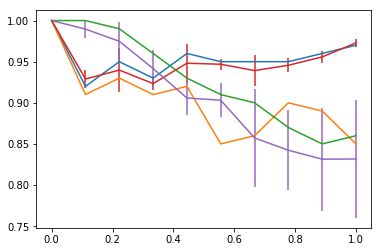

In [57]:
plt.plot(s, np.max(sa, axis = 1))
plt.plot(s, sa[:, -1])
plt.plot(s, np.max(sa_alt, axis = 1))

plt.errorbar(s, max_estimates_mean, yerr = max_estimates_var)
plt.errorbar(s, alt_estimates_mean, yerr = alt_estimates_var)

In [ ]:
# We pass the first sanity check, but it seems like now evaluation on the TRAIN data seems to do better. What's going on here?

# Second independent iteration:

In [58]:
# First sanity check: The selection accuracy increase is not due to the union operation
with open('union_results2.dat', 'rb') as f:
    sa = pickle.load(f)
    sa_alt = pickle.load(f)
    sa_max_estimates = pickle.load(f)
    sa_alt_max_estimates = pickle.load(f)

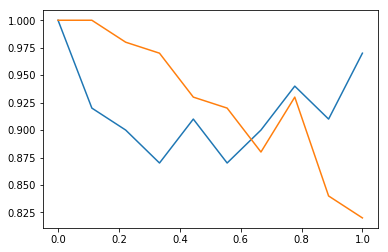

In [60]:
plt.plot(s, np.max(sa, axis = 1))
plt.plot(s, np.max(sa_alt, axis = 1))

In [73]:
np.linspace9)

1.0

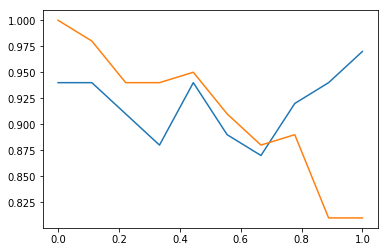

In [62]:
with open('union_results3.dat', 'rb') as f:
    sa = pickle.load(f)
    sa_alt = pickle.load(f)
    sa_max_estimates = pickle.load(f)
    sa_alt_max_estimates = pickle.load(f)
    
plt.plot(s, np.max(sa, axis = 1))
plt.plot(s, np.max(sa_alt, axis = 1))

In [64]:
np.argmax(sa, axis = 1)

array([62, 49, 30, 46, 43, 22, 29, 24,  0,  0], dtype=int64)

In [65]:
np.log(150)

5.0106352940962555

In [ ]:
# Second sanity check: Does expanding the range of the manual penalty lead to similar performance between train and test data 
# penalties?
with open('large_penalty.dat', 'rb') as f:
    sa = pickle.load(f)
    sa_alt = pickle.load(f)


In [82]:
np.linspace(0, 8, 80)[20]

2.0253164556962027

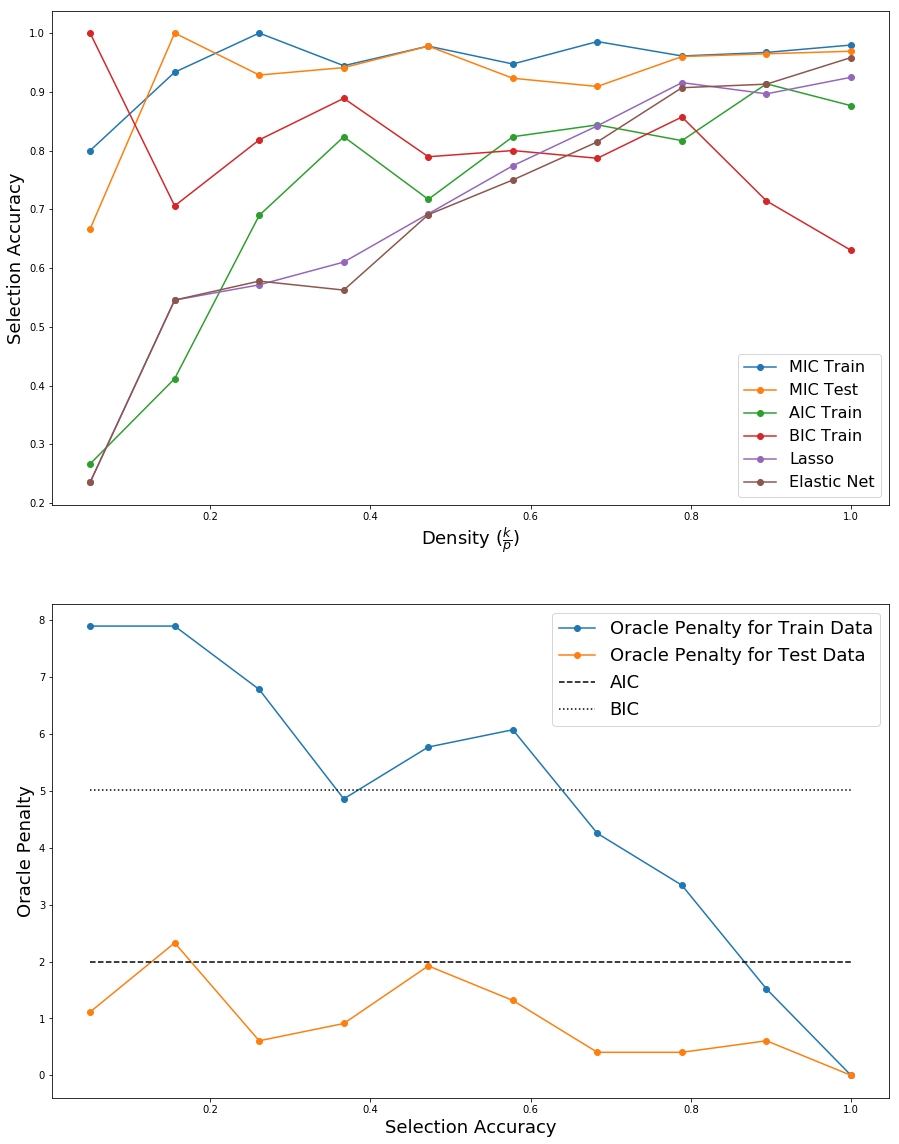

In [18]:
fig, ax = plt.subplots(2, 1, figsize = (15, 20))

a = ax[0]
a.plot(sparsity, mic_sa, '-o')
a.plot(sparsity, mic_sa2, '-o')
a.plot(sparsity, uoilAIC_sa, '-o')
a.plot(sparsity, uoilBIC_sa, '-o')
a.plot(sparsity, lasso_sa, '-o')
a.plot(sparsity, en_sa, '-o')
a.legend(['MIC Train', 'MIC Test', 'AIC Train', 'BIC Train', 'Lasso', 'Elastic Net'], fontsize = 16)

a.set_ylabel('Selection Accuracy', fontsize = 18)
a.set_xlabel(r'Density $(\frac{k}{p})$', fontsize = 18)


a = ax[1]
a.plot(sparsity, pen, '-o')
a.plot(sparsity, pen2, '-o')
a.plot(sparsity, 2 * np.ones(sparsity.size), '--', color = 'black')
a.plot(sparsity, np.log(150) * np.ones(sparsity.size), ':', color = 'black')
a.legend(['Oracle Penalty for Train Data', 'Oracle Penalty for Test Data', 'AIC', 'BIC'], fontsize = 18)
a.set_xlabel('Selection Accuracy', fontsize = 18)
a.set_ylabel('Oracle Penalty', fontsize = 18)

plt.savefig('broad_MIC.pdf', bbox_inches = 'tight', pad_inches = 0)

In [5]:
from sklearn.linear_model import LassoCV, ElasticNetCV

In [6]:
n_features = 50
n_samples = 150

# Sparsity 
sparsity = np.linspace(0.05, 1, 10)
# Selection accuracies
lasso_sa = np.zeros(sparsity.size)
en_sa = np.zeros(sparsity.size)

for i, s in enumerate(sparsity):
    sigma = gen_covariance(n_features, 0, n_features, 1, 0)
    beta = gen_beta2(n_features, n_features, s)
    X, _, y, _, _ = gen_data(n_samples, n_features, covariance = sigma, beta = beta)
    
    lasso = LassoCV(n_alphas = 48, cv = 5).fit(X, y.ravel())
    en = ElasticNetCV(l1_ratio = [0.1, 0.2, 0.5, 0.75, 0.9, 0.95], cv = 5, n_alphas = 48).fit(X, y.ravel())
    
    lasso_sa[i] = selection_accuracy(beta.ravel(), lasso.coef_.ravel())
    en_sa[i] = selection_accuracy(beta.ravel(), en.coef_.ravel())

In [7]:
from pyuoi.linear_model.lasso import UoI_Lasso

In [8]:
n_features = 50
n_samples = 150

# Sparsity 
sparsity = np.linspace(0.05, 1, 10)
# Selection accuracies
uoilAIC_sa = np.zeros(sparsity.size)

for i, s in enumerate(sparsity):
    sigma = gen_covariance(n_features, 0, n_features, 1, 0)
    beta = gen_beta2(n_features, n_features, s)
    X, _, y, _, _ = gen_data(n_samples, n_features, covariance = sigma, beta = beta)
    
    uoil = UoI_Lasso(estimation_score = 'AIC').fit(X, y.ravel())
    
    uoilAIC_sa[i] = selection_accuracy(beta.ravel(), uoil.coef_.ravel())

In [9]:
n_features = 50
n_samples = 150

# Sparsity 
sparsity = np.linspace(0.05, 1, 10)
# Selection accuracies
uoilBIC_sa = np.zeros(sparsity.size)

for i, s in enumerate(sparsity):
    sigma = gen_covariance(n_features, 0, n_features, 1, 0)
    beta = gen_beta2(n_features, n_features, s)
    X, _, y, _, _ = gen_data(n_samples, n_features, covariance = sigma, beta = beta)
    
    uoil = UoI_Lasso(estimation_score = 'BIC').fit(X, y.ravel())
    
    uoilBIC_sa[i] = selection_accuracy(beta.ravel(), uoil.coef_.ravel())

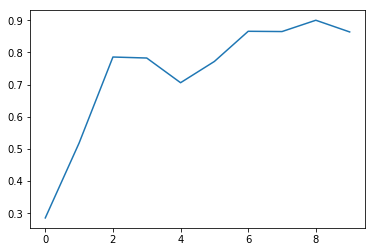

In [6]:
plt.plot(uoil_sa)

In [7]:
sparsity

array([0.05      , 0.15555556, 0.26111111, 0.36666667, 0.47222222,
       0.57777778, 0.68333333, 0.78888889, 0.89444444, 1.        ])

In [20]:
# Further sanity check: Is the bump in selection accuracy just due to handpicking the max selection accuracy 
with open('AIC_repeated.dat', 'rb') as f:
    aic_sa = pickle.load(f)

In [10]:
with open('MIC_proper.dat', 'rb') as f:
    mic_sa = pickle.load(f)
    pen = pickle.load(f)

In [11]:
with open('MIC_proper_test.dat', 'rb') as f:
    mic_sa2 = pickle.load(f)
    pen2 = pickle.load(f)

In [27]:
np.linspace(0, 8, 80)[20]

2.0253164556962027

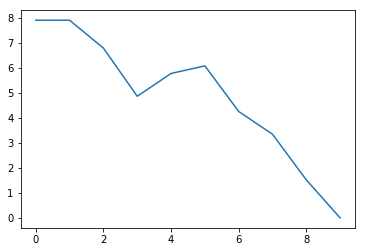

In [6]:
plt.plot(pen)

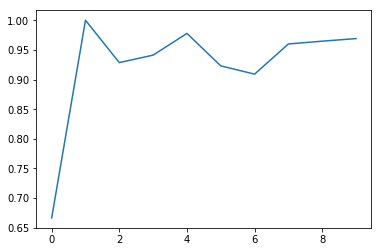

In [14]:
plt.plot(mic_sa2)


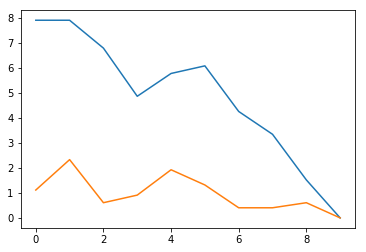

In [15]:
plt.plot(pen)
plt.plot(pen2)

In [26]:
with open('lasen.dat', 'rb') as f:
    lasso_sa = pickle.load(f)
    en_sa = pickle.load(f) 

In [34]:
selection_accuracy(np.array([0, 1, 1]), np.array([0, 1, 0]))

> c:\users\akumar\nse\uoicorr\utils.py(490)selection_accuracy()
-> selection_accuracy[i] = 1 - \
(Pdb) Sb
{1, 2}
(Pdb) Sbhat
{1}
(Pdb) Sb.difference(Sbhat)
{2}
(Pdb) Sb.difference(Sbhat).union(Sbhat.difference(Sb))
{2}
(Pdb) Sbhat.difference(Sb)
set()
(Pdb) continue


array([0.66666667])